<a href="https://colab.research.google.com/github/cesarrivera52/Actividad-4/blob/main/Actividad4_RegresionLineal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#César Alejandro Rivera Guzmán  A01567012
#Actividad 4
#Regresión Lineal 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
files.upload()

In [ ]:
data=pd.read_excel('microretailer_mit_lift_lab_actualizado (1).xlsx')
data

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,NaN,NaN,NaN,NaN
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,Grocery store (aka. nanostore),...,En desacuerdo,NaN,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,NaN,NaN,NaN,NaN
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,1 Photo,productos tradicionales,...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminar columnas innecesarias
datam1=data.drop(["_record_id","_title","_server_updated_at","234_willingness_participate_workshop","_geometry","_latitude","_longitude","229_store_picture",],axis=1)

In [ ]:
datam1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 98 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   _updated_by                                                 330 non-null    object 
 1   228_store_name                                              329 non-null    object 
 2   232_type_of_store                                           330 non-null    object 
 3   108_does_the_micro_retailer_has_a_barred_window_            330 non-null    object 
 4   99_does_the_micro_retailer_exhibits_products_outside_       330 non-null    object 
 5   102_does_the_micro_retailer_sells_fresh_products_           330 non-null    object 
 6   97_number_of_customers_in_store                             330 non-null    int64  
 7   268_number_fridges                                          321 non-null    float64
 8   

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por la palabra Anónimo
datam1["319_shopkeepers_last_name"]=datam1["319_shopkeepers_last_name"].fillna("Anónimo")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por la palabra Anónimo
datam1["318_shopkeeper_name"]=datam1["318_shopkeeper_name"].fillna("Anónimo")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por la palabra Anónimo
datam1["235_email"]=datam1["235_email"].fillna("Anónimo")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por la palabra Anónimo
datam1["236_whatsapp"]=datam1["236_whatsapp"].fillna("Anónimo")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por el número 0
datam1["271_card_fee"]=datam1["271_card_fee"].fillna("0")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por el número 0
datam1["273_platform_extra_charge"]=datam1["273_platform_extra_charge"].fillna("0")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por el número 0
datam1["274_platform_fee"]=datam1["274_platform_fee"].fillna("0")

In [ ]:
#Lo que hacemos aqui es sustituir los valores núlos por el número 0
datam1["275_platform_days_receive_money"]=datam1["275_platform_days_receive_money"].fillna("0")

In [ ]:
#Filtro para separar variables cuantitativas
fdatam_cual=datam1.iloc[:,[0,1,2,3,4,5,8,10,11,12,13,16,17,18,19,20,21,23,25,27,28,29,30,31,32,33,39,40,41,43,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93,94,95,96,97]]

In [ ]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
fdatam_cual=fdatam_cual.fillna(method="bfill")

In [ ]:
#Sustituir valores nulos por valores no nulos hacia adelante forward fill" ("ffill")
fdatam_cual=fdatam_cual.fillna(method="ffill")

In [ ]:
#Identificar valores nulos por columna
valores_nulos=fdatam_cual.isnull().sum()
valores_nulos

_updated_by                                              0
228_store_name                                           0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
                                                        ..
267_technology_investment_customer_preferences           0
318_shopkeeper_name                                      0
319_shopkeepers_last_name                                0
236_whatsapp                                             0
235_email                                                0
Length: 76, dtype: int64

In [ ]:
#Filtro para separar variables cuantitativas
fdatam_cuan=datam1.iloc[:,[6,7,9,14,15,22,24,26,34,35,36,37,38,42,44,49,50,51,52,53,71,83]]

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=fdatam_cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 97_number_of_customers_in_store                       5.000
268_number_fridges                                    5.000
104_how_many_shelves_does_the_micro_retailer_have    13.500
2_current_permanent_employees                         3.500
4_number_permanent_employees_last_year                5.000
103_number_own_fridges                                5.375
145_number_direct_competitors                        10.625
24_burnout                                           12.000
272_card_days_receive_money                           1.000
276_expected_days_informal_credit                    34.500
36_credit_default_rate                                5.000
315_frequency_topups                                 17.625
316_frequency_utility_bills                          16.000
317_home_deliveries                                  25.750
62_frequency_only_services                           17.250
78_number_home_deliveries_week                        6.000
172_supplier_f

In [ ]:
data3=fdatam_cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.0,3.0,3.0,2.0,NaN,3.0,5.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,2.0,10.0
1,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.0,1.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,0.0
326,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Segundo método de sustitución de valores nulos
#Sustituir valores nulos con mediana
data4=data3.fillna(round(fdatam_cuan.median(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Segundo método de sustitución de valores nulos
#Sustituir valores nulos con mediana
data5=data4.fillna(round(fdatam_cuan.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto 
data5["271_card_fee"]= data5["271_card_fee"].fillna(0) 

In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto 
data5["273_platform_extra_charge"]= data5["273_platform_extra_charge"].fillna(0) 

In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto 
data5["274_platform_fee"]= data5["274_platform_fee"].fillna(0) 

In [ ]:
#Identificar valores nulos por columna
valores_nulos=data5.isnull().sum()
valores_nulos

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
271_card_fee                                         0
272_card_days_receive_money                          0
273_platform_extra_charge                            0
274_platform_fee                                     0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_frequency_utility_bills                          0
317_home_deliveries                                  0
62_frequen

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   97_number_of_customers_in_store                    330 non-null    float64
 1   268_number_fridges                                 330 non-null    float64
 2   104_how_many_shelves_does_the_micro_retailer_have  330 non-null    float64
 3   2_current_permanent_employees                      330 non-null    float64
 4   4_number_permanent_employees_last_year             330 non-null    float64
 5   103_number_own_fridges                             330 non-null    float64
 6   145_number_direct_competitors                      330 non-null    float64
 7   24_burnout                                         330 non-null    float64
 8   271_card_fee                                       330 non-null    int64  
 9   272_card_d

In [ ]:
#Cargar archivo csv desde seaborn
df=(data5)
df.head(5)

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.0,3.0,3.0,2.0,2.0,3.0,5.0,2.0,0,1.0,...,0.0,8.0,1.0,6.5,2.0,5.0,10.0,2.0,2.0,10.0
1,2.0,0.0,0.0,2.0,2.0,1.0,3.0,4.0,0,1.0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
2,2.0,0.0,0.0,2.0,2.0,1.0,3.0,4.0,0,1.0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,10.0,4.0,0,1.0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,1.0,0.0
4,3.0,2.0,3.0,2.0,2.0,1.0,3.0,4.0,0,1.0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0


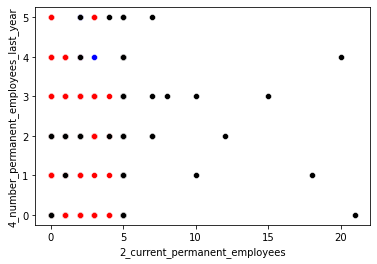

In [ ]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='2_current_permanent_employees', y='4_number_permanent_employees_last_year', color="blue", data=df)
sns.scatterplot(x='268_number_fridges', y='4_number_permanent_employees_last_year', color="red", data=df)
sns.scatterplot(x='317_home_deliveries', y='4_number_permanent_employees_last_year', color="black", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df[['2_current_permanent_employees', '268_number_fridges','317_home_deliveries']]
Var_Dep1= df['4_number_permanent_employees_last_year']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model1)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep1)


LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['2_current_permanent_employees', '268_number_fridges',
        '317_home_deliveries'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.86806805, -0.04184236,  0.00500176]),
 '_residues': 181.99175084329084,
 'rank_': 3,
 'singular_': array([32.88601547, 24.39672756, 14.28425616]),
 'intercept_': 0.3489830728240986}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model1.score(Vars_Indep1,Var_Dep1)

0.4592162712659743

MODELO PREDICTIVO

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred1= model1.predict(X=df[['2_current_permanent_employees', '268_number_fridges', '317_home_deliveries']])
y_pred1

array([1.9846009 , 2.11012799, 2.11012799, 0.37399189, 2.02644326,
       2.06828562, 2.02644326, 2.02644326, 1.93775677, 0.37399189,
       2.11012799, 2.89451131, 2.06828562, 2.11012799, 0.33214953,
       1.24205994, 1.11653285, 1.24205994, 0.33214953, 2.93635367,
       1.24205994, 2.02644326, 2.11012799, 2.11012799, 0.37399189,
       2.02644326, 2.09329444, 1.24205994, 1.23522992, 1.20021758,
       2.85266894, 2.02644326, 2.02644326, 2.06828562, 0.20662244,
       2.11012799, 2.11012799, 2.11012799, 2.06828562, 0.33214953,
       1.03284812, 2.86084422, 2.02644326, 2.11012799, 2.02644326,
       2.11012799, 0.37399189, 0.33214953, 2.06828562, 2.11012799,
       2.11012799, 2.11012799, 2.06828562, 2.02644326, 1.9846009 ,
       2.11012799, 2.11012799, 1.94275853, 2.02644326, 2.96319074,
       2.10512622, 1.03284812, 2.11012799, 1.24205994, 0.37399189,
       2.97819604, 1.24205994, 2.06828562, 2.11012799, 2.11012799,
       2.11012799, 2.97819604, 2.06828562, 2.02644326, 2.97819

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred1)
df

,Predicciones,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.984601,1.0,3.0,3.0,2.0,2.0,3.0,5.0,2.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,10.0,2.0,2.0,10.0
1,2.110128,2.0,0.0,0.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
2,2.110128,2.0,0.0,0.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
3,0.373992,1.0,0.0,0.0,0.0,0.0,1.0,10.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,1.0,0.0
4,2.026443,3.0,2.0,3.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2.068286,0.0,1.0,7.0,2.0,2.0,1.0,5.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,1.0,1.0,5.0,0.0
326,2.110128,1.0,0.0,5.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
327,2.068286,3.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0
328,2.068286,0.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,0,...,0.0,8.0,1.0,6.5,2.0,5.0,3.0,2.0,2.0,2.0


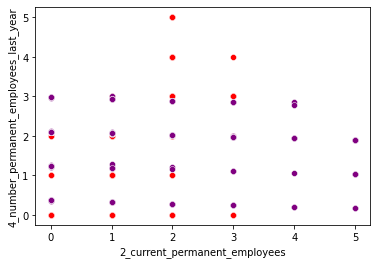

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='2_current_permanent_employees', y='4_number_permanent_employees_last_year', color="red", data=df)
sns.scatterplot(x='268_number_fridges', y='Predicciones', color="purple", data=df)
#sns.lineplot(x='268_number_fridges', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.4592162712659743

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.6776549795183198